In [14]:
# import statements

from google.colab import files
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from scipy.stats import multivariate_normal
from sklearn.metrics import silhouette_score


In [15]:
# uploading the data
uploaded_train = files.upload()

Saving A2Q3.csv to A2Q3 (1).csv


In [16]:
# reading data from dataset-1

df = pd.read_csv(io.BytesIO(uploaded_train['A2Q3.csv']))

dataset = df.to_numpy()
print(dataset.shape)


(399, 2)


In [17]:
class GMM:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.means = None
        self.covariances = None
        self.weights = None
    
    def fit(self, X):
        # Initialize means, covariances, and weights
        n_samples, n_features = X.shape
        self.means = np.random.rand(self.k, n_features)
        self.covariances = np.zeros((self.k, n_features, n_features))
        for i in range(self.k):
            self.covariances[i] = np.eye(n_features)
        self.weights = np.ones(self.k) / self.k

        array_log_likelihood = []        
        
        # Run EM algorithm
        for i in range(self.max_iters):
            if len(array_log_likelihood)>2 and (np.abs(array_log_likelihood[-1]-array_log_likelihood[-2])/np.abs(array_log_likelihood[-2]))<1e-10:
              break

            # E-step
            r_ic = np.zeros((n_samples, self.k))
            for j in range(self.k):
                r_ic[:, j] = self.weights[j] * multivariate_normal.pdf(X, self.means[j], self.covariances[j])
            r_ic_sum = np.sum(r_ic, axis=1)
            r_ic = r_ic / r_ic_sum[:, np.newaxis]
            
            # M-step
            N_k = np.sum(r_ic, axis=0)
            self.weights = N_k / n_samples
            for j in range(self.k):
                self.means[j] = np.sum(X * r_ic[:, j][:, np.newaxis], axis=0) / N_k[j]
                diff = X - self.means[j]
                self.covariances[j] = np.dot(r_ic[:, j] * diff.T, diff) / N_k[j]
            
            log_likelihood = 0

            for i in range(n_samples):
              temp_sum = 0
              for j in range(self.k):
                temp_sum += r_ic[i][j]*multivariate_normal.pdf(dataset[i],self.means[j],self.covariances[j])
              log_likelihood += np.log(temp_sum)
            
            array_log_likelihood += [log_likelihood]
        
        else:
          i = self.max_iters

        return array_log_likelihood,i
          
    
    def predict(self, X):
        n_samples, n_features = X.shape
        r_ic = np.zeros((n_samples, self.k))
        for j in range(self.k):
            r_ic[:, j] = self.weights[j] * multivariate_normal.pdf(X, self.means[j], self.covariances[j])
        return np.argmax(r_ic, axis=1)


3) a) Implementing the EM algorithm for GMM and plotting the log likelihood as a function of iterations. We have considered k = 2 here.

Text(0, 0.5, 'log likelihood')

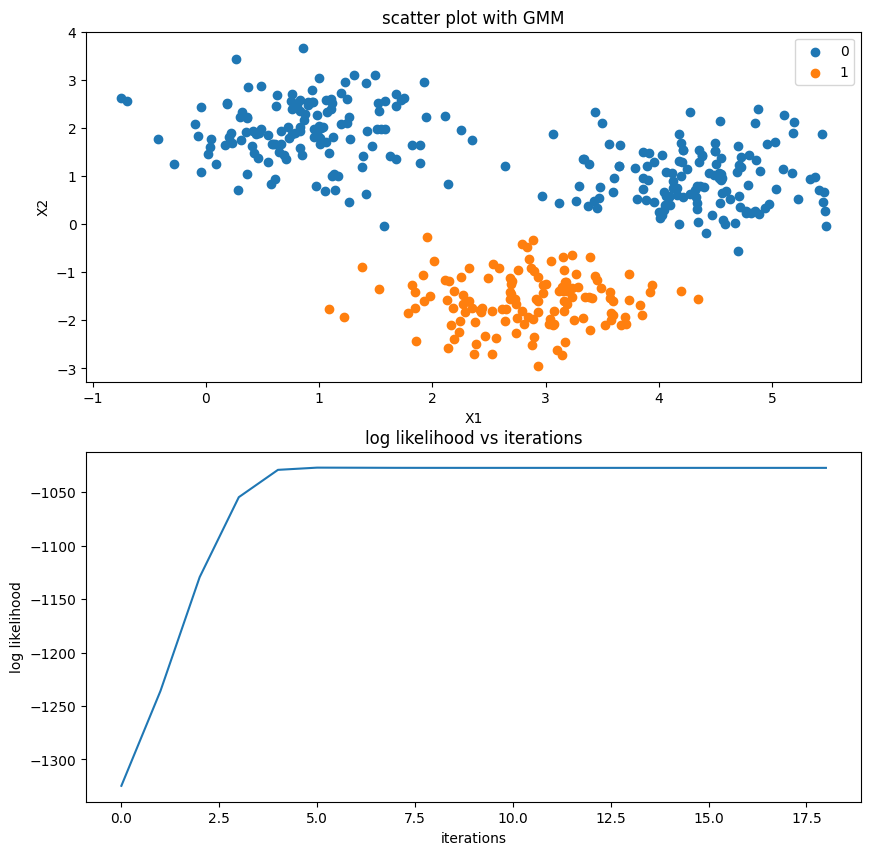

In [18]:
k = 2

gmm = GMM(k)

log_likelihood,iteration = gmm.fit(dataset)

iteration = np.arange(iteration)

label = gmm.predict(dataset)

dataset_transposed = dataset.transpose()

i_label_0 = np.where(label == 0)
i_label_1 = np.where(label == 1)

dataset_0_x1 = dataset_transposed[0][i_label_0]
dataset_0_x2 = dataset_transposed[1][i_label_0]
dataset_1_x1 = dataset_transposed[0][i_label_1]
dataset_1_x2 = dataset_transposed[1][i_label_1]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax[0].scatter(dataset_0_x1, dataset_0_x2,label="0")
ax[0].scatter(dataset_1_x1, dataset_1_x2,label="1")

ax[0].set_title("scatter plot with GMM")
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].legend()

ax[1].set_title("log likelihood vs iterations")
ax[1].plot(iteration,log_likelihood)
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("log likelihood")


3) b) Running EM algorithm for different values of k(k=1 to k=6 done here) and plotting the clustered data and log likelihood vs iteration for each k.

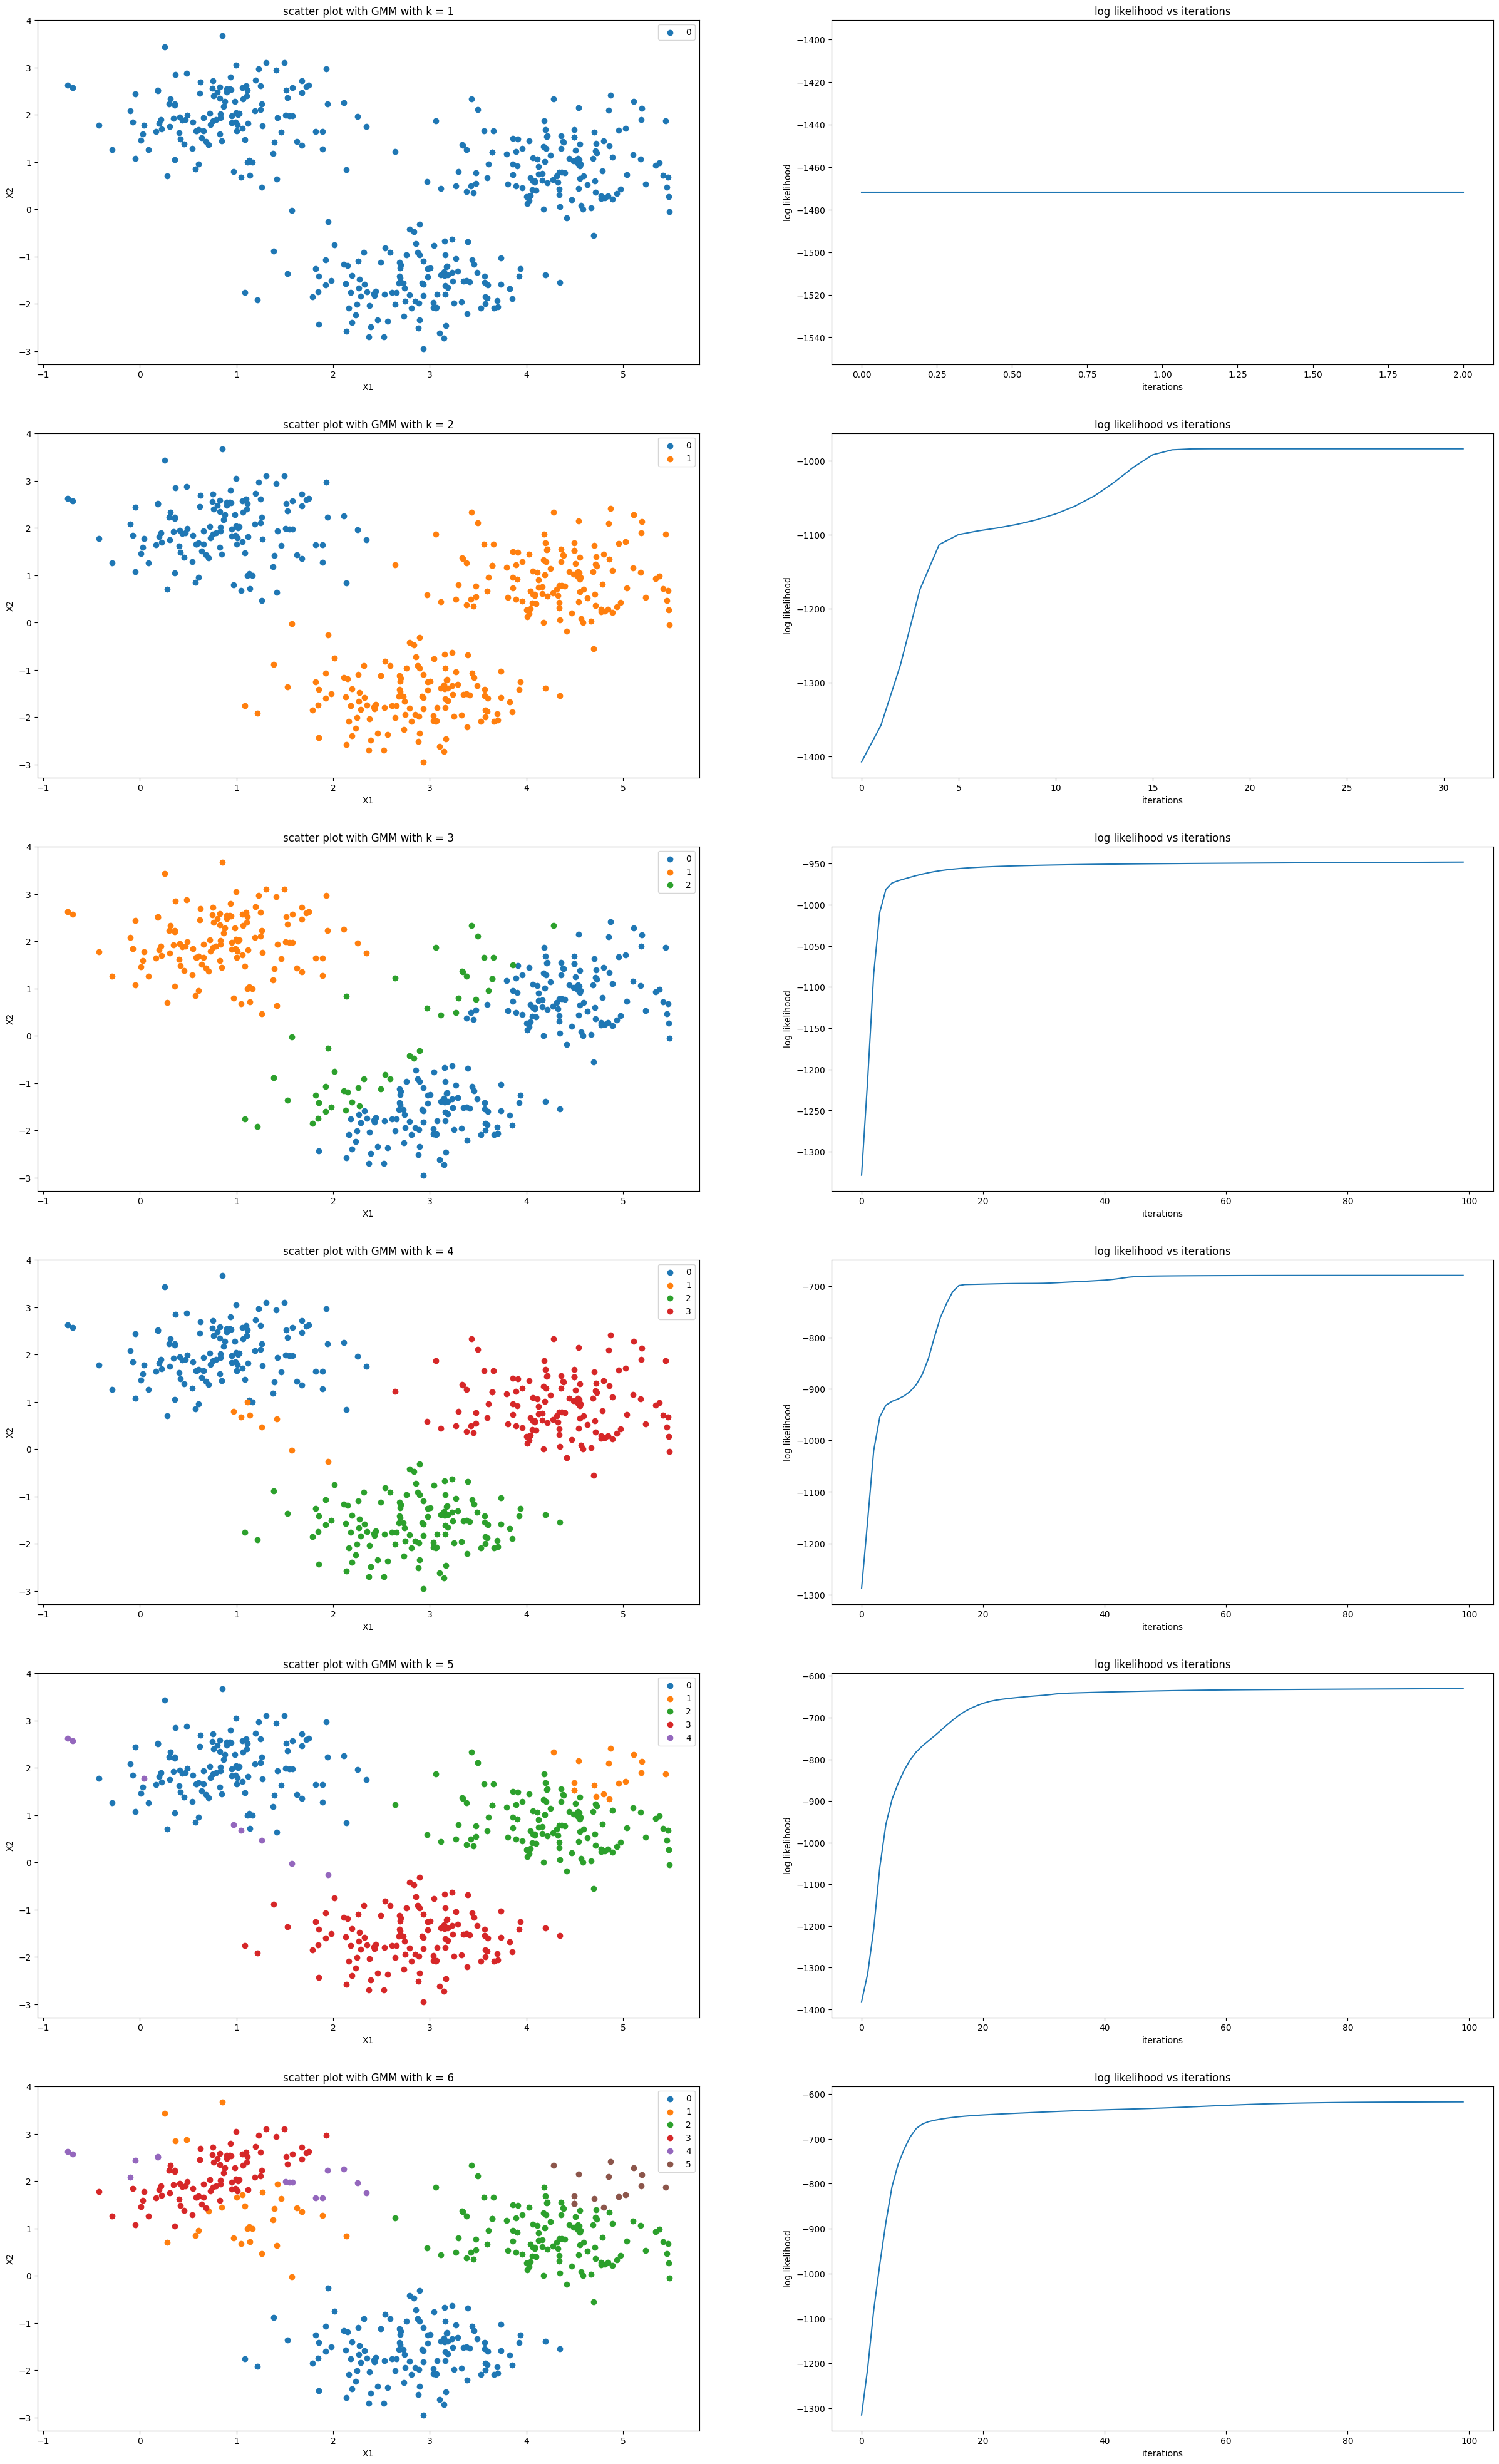

In [19]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(30, 50))

for k in range(1,7):

    gmm = GMM(k)

    log_likelihood,iteration = gmm.fit(dataset)

    iteration = np.arange(iteration)

    label = gmm.predict(dataset)

    dataset_transposed = dataset.transpose()

    i_label = []

    dataset_label_x1 = []
    dataset_label_x2 = []

    for i in range(k):
      i_label = np.where(label == i)
      dataset_x1 = dataset_transposed[0][i_label]
      dataset_x2 = dataset_transposed[1][i_label]

      ax[k-1][0].scatter(dataset_x1, dataset_x2,label=str(i))

    ax[k-1][0].set_title("scatter plot with GMM with k = "+str(k))
    ax[k-1][0].set_xlabel('X1')
    ax[k-1][0].set_ylabel('X2')
    ax[k-1][0].legend()

    ax[k-1][1].set_title("log likelihood vs iterations")
    ax[k-1][1].plot(iteration,log_likelihood)
    ax[k-1][1].set_xlabel("iterations")
    ax[k-1][1].set_ylabel("log likelihood")


3) c)

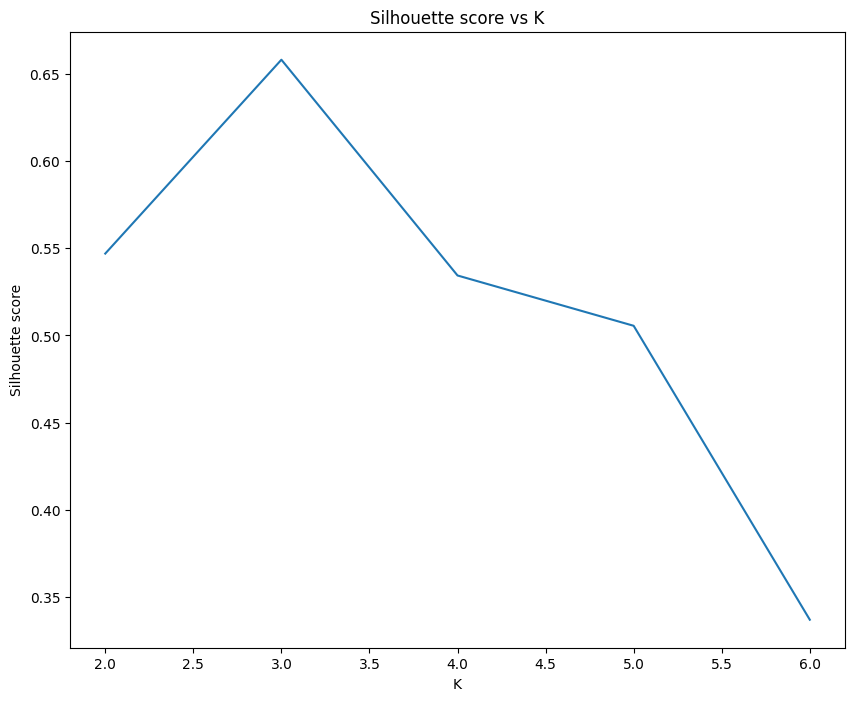

In [20]:
silhoutte_score = []

for k in range(2,7):

    gmm = GMM(k)

    log_likelihood,iteration = gmm.fit(dataset)

    iteration = np.arange(iteration)

    label = gmm.predict(dataset)

    silhoutte_score += [silhouette_score(dataset, label)]

k_range = np.arange(2,7)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax.set_title("Silhouette score vs K")
ax.set_xlabel("K")
ax.set_ylabel("Silhouette score")
ax.plot(k_range,silhoutte_score)



From the above graph of Silhoutte score vs k , we see that k=3 is best.